In [1]:
# Look at stardard cnn_lstm for 3 signals
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import cnn_lstm
from peratouch.config import datapath_five_users

D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
D.normalize()
D.resample_random_combinations(aug_factor=2)
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[0.99839183]
[1.00500158]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (9328, 3, 32) 
Shape of train set: (44924, 3, 32) 
Shape of validation set: (7928, 3, 32) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=1.158, loss_val=1.160, train=49.3%, val=49.8%
End of epoch 2:loss_tr=0.983, loss_val=0.978, train=57.4%, val=57.7%
End of epoch 3:loss_tr=0.912, loss_val=0.924, train=62.7%, val=62.6%
End of epoch 4:loss_tr=0.735, loss_val=0.743, train=70.3%, val=70.1%
End of epoch 5:loss_tr=0.638, loss_val=0.647, train=74.6%, val=74.3%
End of epoch 6:loss_tr=0.633, loss_val=0.646, train=75.6%, val=75.1%
End of epoch 7:loss_tr=0.599, loss_val=0.611, train=76.1%, val=76.0%
End of epoch 8:loss_tr=0.558, loss_val=0.573, train=78.3%, val=77.7%
End of epoch 9:loss_tr=0.533, loss_val=0.562, train=79.6%, val=78.3%
End of epoch 10:loss_tr=0.505, loss_val=0.531, train=80.8%, val=79.6%
End of epoch 11:loss_tr=0.489, loss_val=0.514, train=81.4%, val=80.2%
End of epoch 12:loss_tr=0.524, loss_val=0.554, train=79.3%, val=78.2%
End of epoch 13:loss_tr=0.472, loss_val=0.492, train=82.4%, val=81.2%
End of epoch 14:loss_tr=0.464, loss_val=0.480, train=82.4%, val=81.9%
End of epoch 15:loss_tr=0.435

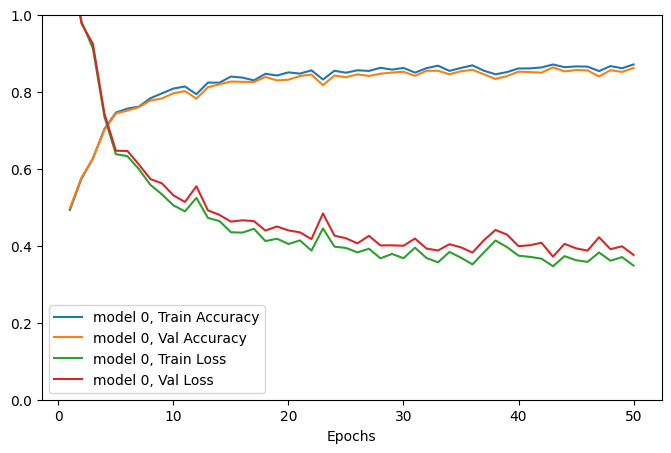

In [2]:
model = cnn_lstm(input_ch=3, n_filters_start=4, hidden_lstm=16, out_size=5) 
T = Trainer(D)
T.setup(model, learning_rate=5e-2, weight_decay=1e-3, batch_size=5000, max_epochs=50, verbose=True)
T.train_model(model)

plot_train([T])
test_accuracy([D], [model])

Train, test and validation data normalized to:
[1.]
[0.99839183]
[1.00500158]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (4664, 8, 4) 
Shape of train set: (22462, 8, 4) 
Shape of validation set: (3964, 8, 4) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32
End of epoch 1:loss_tr=1.572, loss_val=1.570, train=24.8%, val=25.7%
End of epoch 2:loss_tr=1.532, loss_val=1.531, train=32.3%, val=32.5%
End of epoch 3:loss_tr=1.460, loss_val=1.456, train=36.1%, val=36.8%
End of epoch 4:loss_tr=1.411, loss_val=1.400, train=40.0%, val=41.1%
End of epoch 5:loss_tr=1.312, loss_val=1.306, train=43.7%, val=45.2%
End of epoch 6:loss_tr=1.287, loss_val=1.283, train=44.2%, val=44.9%
End of epoch 7:loss_tr=1.259, loss_val=1.254, train=45.8%, val=46.3%
End of epoch 8:loss_tr=1.253, loss_val=1.250, train=44.9%, val=45.1%
End of epoch 9:loss_tr=1.229, loss_val=1.

End of epoch 113:loss_tr=0.991, loss_val=1.000, train=58.3%, val=57.7%
End of epoch 114:loss_tr=0.969, loss_val=0.975, train=59.7%, val=59.2%
End of epoch 115:loss_tr=0.969, loss_val=0.978, train=59.5%, val=58.9%
End of epoch 116:loss_tr=0.974, loss_val=0.981, train=59.6%, val=58.7%
End of epoch 117:loss_tr=0.981, loss_val=0.991, train=59.4%, val=58.7%
End of epoch 118:loss_tr=0.989, loss_val=0.998, train=58.5%, val=57.5%
End of epoch 119:loss_tr=0.992, loss_val=1.000, train=57.9%, val=57.6%
End of epoch 120:loss_tr=0.965, loss_val=0.972, train=59.6%, val=58.9%
End of epoch 121:loss_tr=0.969, loss_val=0.973, train=59.3%, val=58.6%
End of epoch 122:loss_tr=0.973, loss_val=0.982, train=59.3%, val=58.5%
End of epoch 123:loss_tr=0.968, loss_val=0.976, train=60.0%, val=59.2%
End of epoch 124:loss_tr=0.964, loss_val=0.973, train=59.7%, val=58.4%
End of epoch 125:loss_tr=0.976, loss_val=0.985, train=59.1%, val=58.9%
End of epoch 126:loss_tr=1.001, loss_val=1.011, train=57.5%, val=57.7%
End of

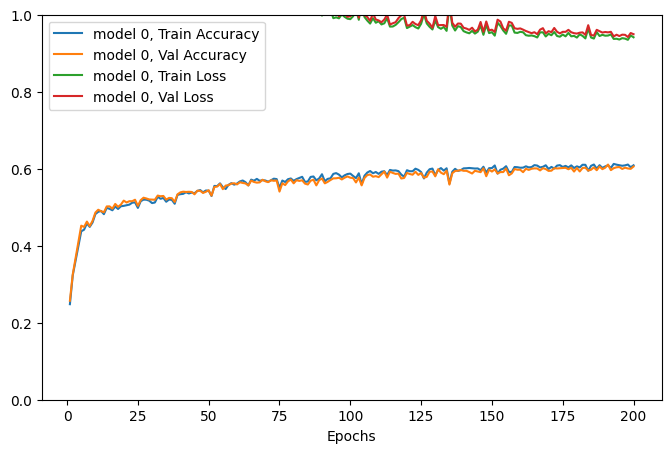

In [1]:
# Case of time-distributed cnn-lstm 
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import cnn_lstm_time_distributed
from peratouch.config import datapath_five_users

input_size = 4 
D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
D.normalize()
D.reshape_for_lstm(input_size=input_size, sliding=False)
D.tensors_to_device()
D.print_shapes()
model = cnn_lstm_time_distributed(input_size=input_size, hidden_conv=8, hidden_lstm=8, out_size=5, global_pool=False) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=5*256, max_epochs=200, verbose=True)
T.train_model(model)

plot_train([T])
test_accuracy([D], [model])